In [2]:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
!kaggle datasets download -d barelydedicated/bank-customer-churn-modeling

Dataset URL: https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling
License(s): CC0-1.0
100% 262k/262k [00:00<00:00, 609kB/s]
100% 262k/262k [00:00<00:00, 608kB/s]


In [4]:
!unzip bank-customer-churn-modeling.zip

Archive:  bank-customer-churn-modeling.zip
  inflating: Churn_Modelling.csv     


In [5]:
!rm bank-customer-churn-modeling.zip

In [6]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df1=df.drop(['RowNumber','CustomerId','Surname'],axis='columns')
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
def plot_some_data(df):
  for cols in df:
    if(cols!='Exited' and df[cols].dtypes!='object'):
      churn_yes=df[df['Exited']==1][cols]
      churn_no=df[df['Exited']==0][cols]
      plt.ylabel('Exited')
      plt.xlabel(cols)
      plt.title(f"Exited vs {cols}")

      plt.hist([churn_yes,churn_no],color=['green','red'],label=['yes','no'])
      plt.legend()
      plt.show()


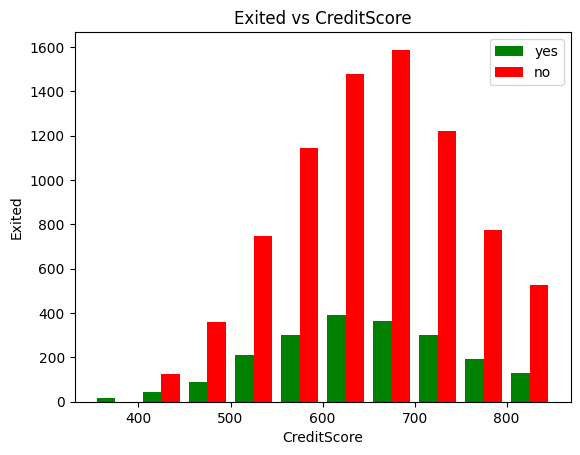

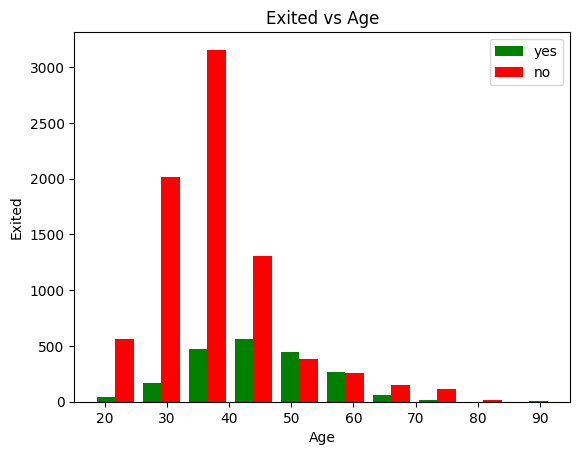

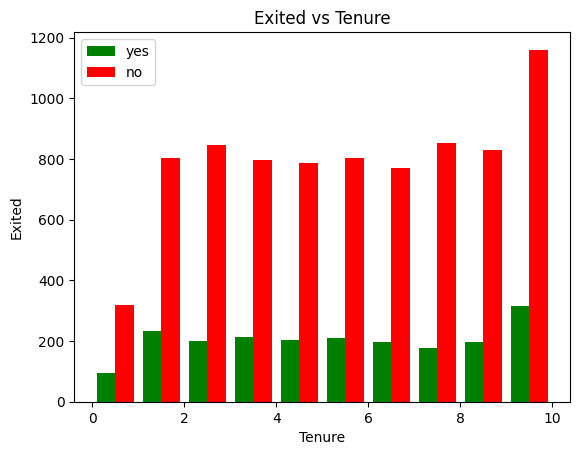

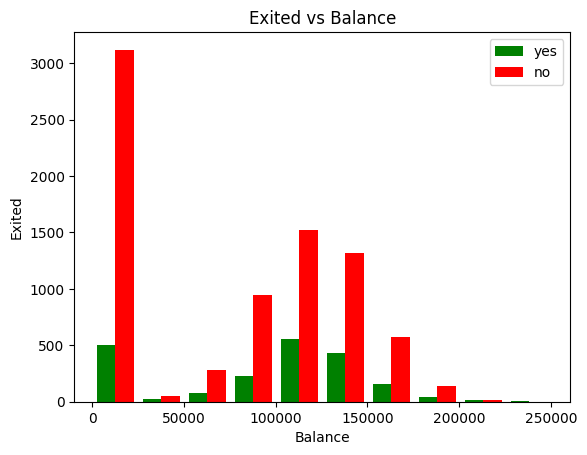

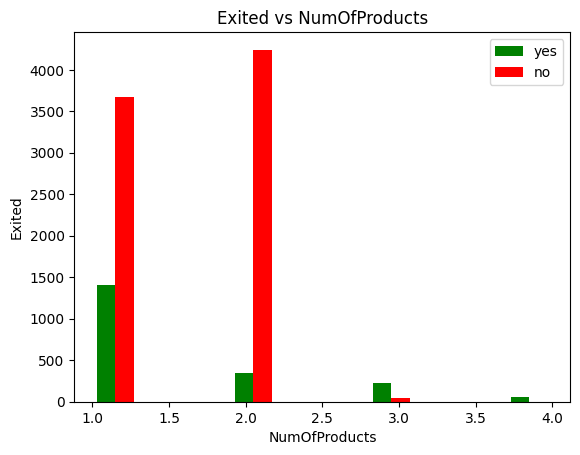

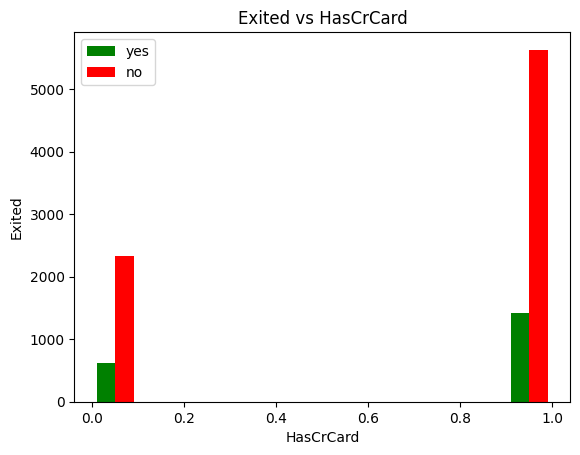

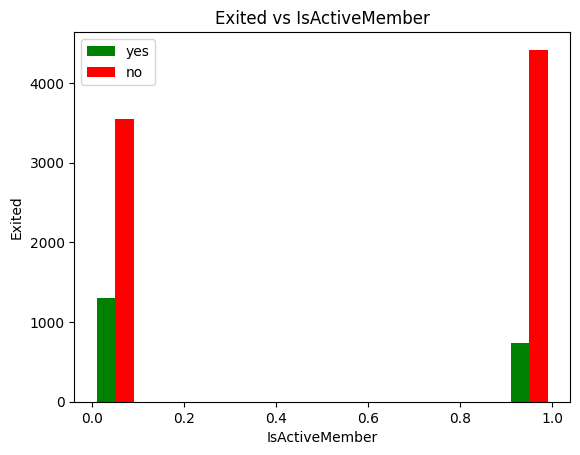

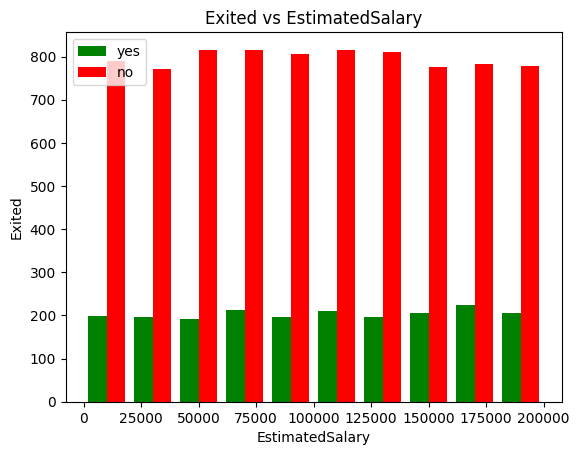

In [ ]:
plot_some_data(df1)

In [ ]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
def get_unique_values_in_categorical_cols(df):
  for cols in df:
    if df[cols].dtypes=='object':
      print(f"{cols}: {df[cols].unique()}")
get_unique_values_in_categorical_cols(df1)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


Changing Female to 0 and Male to 1

In [10]:
df1.Gender.replace({'Female':0,'Male':1},inplace=True)

In [11]:
df1=pd.get_dummies(df1,columns=["Geography"],dtype='int64')
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

In [ ]:
df1.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [12]:
cols_to_scale=["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])

In [ ]:
df1.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.545700,0.282727,0.501280,0.304848,0.176733,0.70550,0.515100,0.500441,0.203700,0.501400,0.250900,0.247700
std,0.193307,0.497932,0.141727,0.289217,0.248696,0.193885,0.45584,0.499797,0.287580,0.402769,0.500023,0.433553,0.431698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.000000,0.189189,0.300000,0.000000,0.000000,0.00000,0.000000,0.254977,0.000000,0.000000,0.000000,0.000000
50%,0.604000,1.000000,0.256757,0.500000,0.387402,0.000000,1.00000,1.000000,0.500960,0.000000,1.000000,0.000000,0.000000
75%,0.736000,1.000000,0.351351,0.700000,0.508749,0.333333,1.00000,1.000000,0.746955,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
X=df1.drop('Exited',axis='columns')
y=df['Exited']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X.shape

(10000, 12)

## Trying with ml Models


In [21]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd

In [ ]:
def grid_search_logistic_regression(X, y):
    params = {
        'C': [0.01, 0.1, 1, 10, 100]
    }
    model = LogisticRegression()
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    gs = GridSearchCV(model, params, cv=cv, return_train_score=False)
    gs.fit(X, y)
    return {
        'model': 'logistic_regression',
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    }

# Function to perform GridSearchCV for Decision Tree
def grid_search_decision_tree(X, y):
    params = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [10, 20, 30, 40, 50]
    }
    model = DecisionTreeClassifier()
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    gs = GridSearchCV(model, params, cv=cv, return_train_score=False)
    gs.fit(X, y)
    return {
        'model': 'decision_tree',
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    }

# Function to perform GridSearchCV for Random Forest
def grid_search_random_forest(X, y):
    params = {
        'n_estimators': [10, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [10, 30, 50]
    }
    model = RandomForestClassifier()
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    gs = GridSearchCV(model, params, cv=cv, return_train_score=False)
    gs.fit(X, y)
    return {
        'model': 'random_forest',
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    }

# Function to perform GridSearchCV for SVM
def grid_search_svm(X, y):
    params = {
        'C': [0.01, 1, 100],
        'kernel': ['linear', 'poly']
    }
    model = SVC()
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    gs = GridSearchCV(model, params, cv=cv, return_train_score=False)
    gs.fit(X, y)
    return {
        'model': 'svm',
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    }

# Function to perform GridSearchCV for K-Nearest Neighbors
def grid_search_knn(X, y):
    params = {
        'n_neighbors': [3, 5, 7, 9, 11]
    }
    model = KNeighborsClassifier()
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    gs = GridSearchCV(model, params, cv=cv, return_train_score=False)
    gs.fit(X, y)
    return {
        'model': 'knn',
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    }

# Function to perform GridSearchCV for Naive Bayes
def grid_search_naive_bayes(X, y):
    params = {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    }
    model = GaussianNB()
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    gs = GridSearchCV(model, params, cv=cv, return_train_score=False)
    gs.fit(X, y)
    return {
        'model': 'naive_bayes',
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    }

# Collect results from all models

results = []


In [ ]:
results.append(grid_search_logistic_regression(X, y))
print(results)

[{'model': 'logistic_regression', 'best_score': 0.8150000000000001, 'best_params': {'C': 0.1}}]


In [ ]:
results.append(grid_search_decision_tree(X, y))
print(results)

[{'model': 'logistic_regression', 'best_score': 0.8150000000000001, 'best_params': {'C': 0.1}}, {'model': 'decision_tree', 'best_score': 0.8457000000000001, 'best_params': {'criterion': 'entropy', 'max_depth': 10}}]


In [ ]:
results.append(grid_search_random_forest(X, y))
print(results)

[{'model': 'logistic_regression', 'best_score': 0.8150000000000001, 'best_params': {'C': 0.1}}, {'model': 'decision_tree', 'best_score': 0.8457000000000001, 'best_params': {'criterion': 'entropy', 'max_depth': 10}}, {'model': 'knn', 'best_score': 0.8231999999999999, 'best_params': {'n_neighbors': 7}}, {'model': 'naive_bayes', 'best_score': 0.8212999999999999, 'best_params': {'var_smoothing': 1e-09}}, {'model': 'svm', 'best_score': 0.8599, 'best_params': {'C': 100, 'kernel': 'poly'}}, {'model': 'random_forest', 'best_score': 0.8700000000000001, 'best_params': {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 200}}]


In [ ]:
results.append(grid_search_knn(X, y))
print(results)

[{'model': 'logistic_regression', 'best_score': 0.8150000000000001, 'best_params': {'C': 0.1}}, {'model': 'decision_tree', 'best_score': 0.8457000000000001, 'best_params': {'criterion': 'entropy', 'max_depth': 10}}, {'model': 'knn', 'best_score': 0.8231999999999999, 'best_params': {'n_neighbors': 7}}]


In [ ]:
results.append(grid_search_naive_bayes(X, y))
print(results)

[{'model': 'logistic_regression', 'best_score': 0.8150000000000001, 'best_params': {'C': 0.1}}, {'model': 'decision_tree', 'best_score': 0.8457000000000001, 'best_params': {'criterion': 'entropy', 'max_depth': 10}}, {'model': 'knn', 'best_score': 0.8231999999999999, 'best_params': {'n_neighbors': 7}}, {'model': 'naive_bayes', 'best_score': 0.8212999999999999, 'best_params': {'var_smoothing': 1e-09}}]


In [ ]:
results.append(grid_search_svm(X, y))
print(results)



[{'model': 'logistic_regression', 'best_score': 0.8150000000000001, 'best_params': {'C': 0.1}}, {'model': 'decision_tree', 'best_score': 0.8457000000000001, 'best_params': {'criterion': 'entropy', 'max_depth': 10}}, {'model': 'knn', 'best_score': 0.8231999999999999, 'best_params': {'n_neighbors': 7}}, {'model': 'naive_bayes', 'best_score': 0.8212999999999999, 'best_params': {'var_smoothing': 1e-09}}, {'model': 'svm', 'best_score': 0.8599, 'best_params': {'C': 100, 'kernel': 'poly'}}]


In [ ]:
pd.DataFrame(results, columns=['model', 'best_score', 'best_params'])


,model,best_score,best_params
0,logistic_regression,0.8150,{'C': 0.1}
1,decision_tree,0.8457,"{'criterion': 'entropy', 'max_depth': 10}"
2,knn,0.8232,{'n_neighbors': 7}
3,naive_bayes,0.8213,{'var_smoothing': 1e-09}
4,svm,0.8599,"{'C': 100, 'kernel': 'poly'}"
5,random_forest,0.8700,"{'criterion': 'gini', 'max_depth': 50, 'n_esti..."


In [18]:
best_model = RandomForestClassifier(
    criterion='gini',
    max_depth=50,
    n_estimators=200
)

In [20]:
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.75      0.51      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [22]:
cf=confusion_matrix(y_test,y_pred)

In [23]:
print(cf)

[[1525   70]
 [ 197  208]]


Text(50.722222222222214, 0.5, 'Truth')

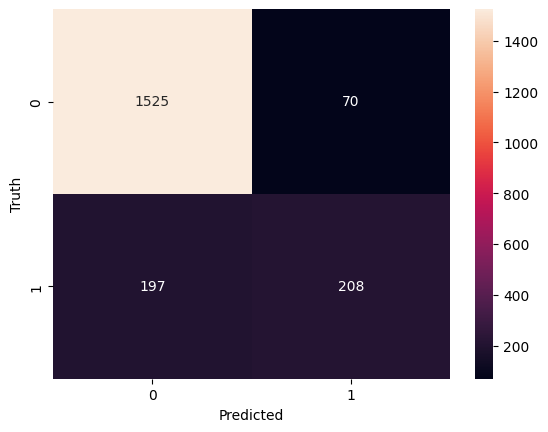

In [24]:
sns.heatmap(cf,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')